In [1]:
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from pyomo.network import Arc, SequentialDecomposition

from idaes.core.util.initialization import propagate_state

# Import plotting functions
import matplotlib.pyplot as plt

# Import numpy library 
import numpy as np

# Import the main FlowsheetBlock from IDAES. The flowsheet block will contain the unit model
from idaes.core import FlowsheetBlock

import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus

# Import the degrees_of_freedom function from the idaes.core.util.model_statistics package
# DOF = Number of Model Variables - Number of Model Constraints
from idaes.core.util.model_statistics import degrees_of_freedom

# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)

# Import unit models from the model library
from idaes.generic_models.unit_models import Flash

# Import R32, R125, IL info file
from HFCs_bmimPF6_PR import configuration

    'pyomo.common.formatting.tabular_writer'.  Please update your import.
    (deprecated in 6.1) (called from <frozen importlib._bootstrap>:228)
    'pyomo.core.base.disable_methods.disable_methods'.  Please update your
    import.  (deprecated in 6.1) (called from <frozen
    importlib._bootstrap>:228)


In [2]:
linestyle =[
     (0, ()),
     (0, (5, 5)),
     (0, (1, 1)),
     (0, (3, 5, 1, 5)),
     (0, (3, 5, 1, 5, 1, 5))]

In [3]:
m1 = ConcreteModel()
m1.fs = FlowsheetBlock(default={"dynamic": False})
m1.fs.properties = GenericParameterBlock(default=configuration)
m1.fs.F101 = Flash(default={"property_package": m1.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m2 = ConcreteModel()
m2.fs = FlowsheetBlock(default={"dynamic": False})
m2.fs.properties = GenericParameterBlock(default=configuration)
m2.fs.F101 = Flash(default={"property_package": m2.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m3 = ConcreteModel()
m3.fs = FlowsheetBlock(default={"dynamic": False})
m3.fs.properties = GenericParameterBlock(default=configuration)
m3.fs.F101 = Flash(default={"property_package": m3.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m4 = ConcreteModel()
m4.fs = FlowsheetBlock(default={"dynamic": False})
m4.fs.properties = GenericParameterBlock(default=configuration)
m4.fs.F101 = Flash(default={"property_package": m4.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m5 = ConcreteModel()
m5.fs = FlowsheetBlock(default={"dynamic": False})
m5.fs.properties = GenericParameterBlock(default=configuration)
m5.fs.F101 = Flash(default={"property_package": m5.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in (or after) 7.0) (called from
    c:\software\my_fork\kappa\idaes-pse-
    main\idaes\generic_models\properties\core\state_definitions\FTPx.py:175)
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in (or after) 7.0) (called from
    c:\software\my_fork\kappa\idaes-pse-
    main\idaes\generic_models\properties\core\state_definitions\FTPx.py:173)
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in (or after) 7.0) (called from
    c:\software\my_fork\kappa\idaes-pse-
    main\idaes\generic_models\properties\core\state_definitions\FTPx.py:178)
    (ordered) position is deprecated.  Please use at()  (deprecated in 6.1,
    will be removed in (or after) 7.0) (called from
    c:\software\my_fork\kappa\idaes-pse-
    main\idaes\generic_models\properties\core\state_definitions\FTPx.py:176)


In [4]:
# Constant M1
m1.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
m1.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
m1.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(-0.02608)
m1.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(-0.0704)
m1.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(0.345)
m1.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(0.058856)

# Linear M2
m2.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.39255)
m2.fs.properties.PR_kappa_A['R125', 'R32'].fix(-0.375437)
m2.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(0.02700)
m2.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(0.26803)
m2.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(-1.601578)
m2.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(-0.111417)
m2.fs.properties.PR_kappa_B['R32', 'R125'].fix(-0.389117)
m2.fs.properties.PR_kappa_B['R125', 'R32'].fix(0.3892)
m2.fs.properties.PR_kappa_B['R32', 'bmimPF6'].fix(-0.04879)
m2.fs.properties.PR_kappa_B['bmimPF6', 'R32'].fix(-0.3153)
m2.fs.properties.PR_kappa_B['bmimPF6', 'R125'].fix(2.086037)
m2.fs.properties.PR_kappa_B['R125', 'bmimPF6'].fix(0.170299)

# Ternary M3
m3.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
m3.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
m3.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(-0.043507)
m3.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(-0.35057)
m3.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(1.677866)
m3.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(0.060435)

# Ternary M4
m4.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.009)
m4.fs.properties.PR_kappa_A['R125', 'R32'].fix(0.007)
m4.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(-0.0328315)
m4.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(-0.1130500)
m4.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(0.413767)
m4.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(0.059460)

# Ternary M5
m5.fs.properties.PR_kappa_A['R32', 'R125'].fix(0.39255)
m5.fs.properties.PR_kappa_A['R125', 'R32'].fix(-0.375437)
m5.fs.properties.PR_kappa_B['R32', 'R125'].fix(-0.389117)
m5.fs.properties.PR_kappa_B['R125', 'R32'].fix(0.3892)

m5.fs.properties.PR_kappa_A['bmimPF6', 'R125'].fix(-1.764584)
m5.fs.properties.PR_kappa_A['R125', 'bmimPF6'].fix(-0.161157)
m5.fs.properties.PR_kappa_A['bmimPF6', 'R32'].fix(-0.010645)
m5.fs.properties.PR_kappa_A['R32', 'bmimPF6'].fix(-0.024842)

m5.fs.properties.PR_kappa_B['bmimPF6', 'R125'].fix(2.123490)
m5.fs.properties.PR_kappa_B['R125', 'bmimPF6'].fix(0.21234)
m5.fs.properties.PR_kappa_B['bmimPF6', 'R32'].fix(-0.09102)
m5.fs.properties.PR_kappa_B['R32', 'bmimPF6'].fix(-0.00556)

In [5]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [6]:
# Set pressures to loop over
R125_z = [0.01, 0.1, 0.3, 0.5, 0.7, 0.99]

# Make outlet arrays
IL_x = np.zeros(len(R125_z))
IL_y = np.zeros(len(R125_z))
R32_x = np.zeros(len(R125_z))
R32_y = np.zeros(len(R125_z))
R125_x = np.zeros(len(R125_z))
R125_y = np.zeros(len(R125_z))

IL_x2 = np.zeros(len(R125_z))
IL_y2 = np.zeros(len(R125_z))
R32_x2 = np.zeros(len(R125_z))
R32_y2 = np.zeros(len(R125_z))
R125_x2 = np.zeros(len(R125_z))
R125_y2 = np.zeros(len(R125_z))

IL_x3 = np.zeros(len(R125_z))
IL_y3 = np.zeros(len(R125_z))
R32_x3 = np.zeros(len(R125_z))
R32_y3 = np.zeros(len(R125_z))
R125_x3 = np.zeros(len(R125_z))
R125_y3 = np.zeros(len(R125_z))
L3 = np.zeros(len(R125_z))
V3 = np.zeros(len(R125_z))

IL_x4 = np.zeros(len(R125_z))
IL_y4 = np.zeros(len(R125_z))
R32_x4 = np.zeros(len(R125_z))
R32_y4 = np.zeros(len(R125_z))
R125_x4 = np.zeros(len(R125_z))
R125_y4 = np.zeros(len(R125_z))
L4 = np.zeros(len(R125_z))
V4 = np.zeros(len(R125_z))

IL_x5 = np.zeros(len(R125_z))
IL_y5 = np.zeros(len(R125_z))
R32_x5 = np.zeros(len(R125_z))
R32_y5 = np.zeros(len(R125_z))
R125_x5 = np.zeros(len(R125_z))
R125_y5 = np.zeros(len(R125_z))
L5 = np.zeros(len(R125_z))
V5 = np.zeros(len(R125_z)) 

m1.fs.F101.inlet.flow_mol.fix(10)
m1.fs.F101.inlet.temperature.fix(298)
m1.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.9) 
m1.fs.F101.inlet.pressure.fix(100000)

m2.fs.F101.inlet.flow_mol.fix(10)
m2.fs.F101.inlet.temperature.fix(298)
m2.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.9) 
m2.fs.F101.inlet.pressure.fix(100000)

m3.fs.F101.inlet.flow_mol.fix(10)
m3.fs.F101.inlet.temperature.fix(298)
m3.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.9) 
m3.fs.F101.inlet.pressure.fix(100000)

m4.fs.F101.inlet.flow_mol.fix(10)
m4.fs.F101.inlet.temperature.fix(298)
m4.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.9) 
m4.fs.F101.inlet.pressure.fix(100000)

m5.fs.F101.inlet.flow_mol.fix(10)
m5.fs.F101.inlet.temperature.fix(298)
m5.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.9) 
m5.fs.F101.inlet.pressure.fix(100000)

m1.fs.F101.vap_outlet.pressure.fix(100000)
m1.fs.F101.vap_outlet.temperature.fix(298.15)

m2.fs.F101.vap_outlet.pressure.fix(100000)
m2.fs.F101.vap_outlet.temperature.fix(298.15)

m3.fs.F101.vap_outlet.pressure.fix(100000)
m3.fs.F101.vap_outlet.temperature.fix(298.15)

m4.fs.F101.vap_outlet.pressure.fix(100000)
m4.fs.F101.vap_outlet.temperature.fix(298.15)

m5.fs.F101.vap_outlet.pressure.fix(100000)
m5.fs.F101.vap_outlet.temperature.fix(298.15)

m1.fs.liq = Param(mutable=True, default=0.3)
m2.fs.liq = Param(mutable=True, default=0.3)
m3.fs.liq = Param(mutable=True, default=0.3)
m4.fs.liq = Param(mutable=True, default=0.4)
m5.fs.liq = Param(mutable=True, default=0.4)

for i in range(len(R125_z)):
    
    m1.fs.F101.inlet.flow_mol.fix(10)
    m1.fs.F101.inlet.temperature.fix(298)
    m1.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.93) 
    m1.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.07*R125_z[i]) 
    m1.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.07*(1-R125_z[i]))
    
    m1.fs.F101.inlet.pressure.fix(100000)

    m2.fs.F101.inlet.flow_mol.fix(10)
    m2.fs.F101.inlet.temperature.fix(298)
    m2.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.93) 
    m2.fs.F101.inlet.pressure.fix(100000)
    m2.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.07*R125_z[i]) 
    m2.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.07*(1-R125_z[i]))

    m3.fs.F101.inlet.flow_mol.fix(10)
    m3.fs.F101.inlet.temperature.fix(298)
    m3.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.93) 
    m3.fs.F101.inlet.pressure.fix(100000)
    m3.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.07*R125_z[i]) 
    m3.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.07*(1-R125_z[i]))

    m4.fs.F101.inlet.flow_mol.fix(10)
    m4.fs.F101.inlet.temperature.fix(298)
    m4.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.93) 
    m4.fs.F101.inlet.pressure.fix(100000)
    m4.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.07*R125_z[i]) 
    m4.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.07*(1-R125_z[i]))
 
    m5.fs.F101.inlet.flow_mol.fix(10)
    m5.fs.F101.inlet.temperature.fix(298)
    m5.fs.F101.inlet.mole_frac_comp[0, "bmimPF6"].fix(0.93) 
    m5.fs.F101.inlet.pressure.fix(100000)
    m5.fs.F101.inlet.mole_frac_comp[0, "R32"].fix(0.07*R125_z[i]) 
    m5.fs.F101.inlet.mole_frac_comp[0, "R125"].fix(0.07*(1-R125_z[i]))
    
    m1.fs.F101.vap_outlet.pressure.fix(100000)
    m1.fs.F101.vap_outlet.temperature.fix(298.15)
    m2.fs.F101.vap_outlet.pressure.fix(100000)
    m2.fs.F101.vap_outlet.temperature.fix(298.15)
    m3.fs.F101.vap_outlet.pressure.fix(100000)
    m3.fs.F101.vap_outlet.temperature.fix(298.15)   
    m4.fs.F101.vap_outlet.pressure.fix(100000)
    m4.fs.F101.vap_outlet.temperature.fix(298.15) 
    m5.fs.F101.vap_outlet.pressure.fix(100000)
    m5.fs.F101.vap_outlet.temperature.fix(298.15) 
    
    m1.fs.liq = R125_z[i]
    m2.fs.liq = R125_z[i]
    m3.fs.liq = R125_z[i]
    m4.fs.liq = R125_z[i]
    m5.fs.liq = R125_z[i]
    
#     m1.fs.F101.initialize(outlvl=idaeslog.CRITICAL)              
#     m2.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
#     m3.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
#     m4.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
#     m5.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    m1.fs.F101.initialize(optarg={'print_level':0})              
    m2.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    m3.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    m4.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    m5.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    # solve the model
    status1 = solver.solve(m1, tee = False)
    status2 = solver.solve(m2, tee = False)
    status3 = solver.solve(m3, tee = False)
    status4 = solver.solve(m3, tee = False)    
    status5 = solver.solve(m3, tee = False)
    
    # If solution is optimal store the concentration, and calculated temperatures in the created arrays
    if (status1.solver.status == SolverStatus.ok) and (status1.solver.termination_condition == TerminationCondition.optimal):

        IL_x[i] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
        IL_y[i] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
        R32_x[i] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_y[i] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_x[i] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_y[i] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 1")
        
        #Change this to feasible
        print("Running R125:",R125_x[i])

    if (status2.solver.status == SolverStatus.ok) and (status2.solver.termination_condition == TerminationCondition.optimal):
        IL_x2[i] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
        IL_y2[i] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
        R32_x2[i] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_y2[i] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_x2[i] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_y2[i] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 2")
        
        #Change this to feasible
        print("Running R125:",R125_x2[i])

    if (status3.solver.status == SolverStatus.ok) and (status3.solver.termination_condition == TerminationCondition.optimal):  

        IL_x3[i] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
        IL_y3[i] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
        R32_x3[i] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_y3[i] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_x3[i] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_y3[i] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 3")

        #Change this to feasible
        print("Running R125:",R125_x3[i])
        
    if (status4.solver.status == SolverStatus.ok) and (status4.solver.termination_condition == TerminationCondition.optimal):  

        IL_x4[i] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
        IL_y4[i] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
        R32_x4[i] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_y4[i] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_x4[i] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_y4[i] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 4")

        #Change this to feasible
        print("Running R125:",R125_x4[i])
        
    if (status5.solver.status == SolverStatus.ok) and (status5.solver.termination_condition == TerminationCondition.optimal):  

        IL_x5[i] = value(m5.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
        IL_y5[i] = value(m5.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
        R32_x5[i] = value(m5.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
        R32_y5[i] = value(m5.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
        R125_x5[i] = value(m5.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
        R125_y5[i] = value(m5.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
        
        print("Model 5")

        #Change this to feasible
        print("Running R125:",R125_x5[i])
    else:
        print('Infeasible.')

2022-05-24 15:11:09 [INFO] idaes.init.fs.F101.control_volume.properties_in: Starting initialization


ApplicationError: Solver (ipopt) did not exit normally

In [ ]:
alpha1 = np.zeros(len(R125_z))
alpha2 = np.zeros(len(R125_z))
alpha3 = np.zeros(len(R125_z))
alpha4 = np.zeros(len(R125_z))
alpha5 = np.zeros(len(R125_z))

for i in range(len(R125_z)):
    alpha1[i] = (R125_y[i]/R125_x[i])/(R32_y[i]/R32_x[i])
    alpha2[i] = (R125_y2[i]/R125_x2[i])/(R32_y2[i]/R32_x2[i])
    alpha3[i] = (R125_y3[i]/R125_x3[i])/(R32_y3[i]/R32_x3[i])
    alpha4[i] = (R125_y4[i]/R125_x4[i])/(R32_y4[i]/R32_x4[i])
    alpha5[i] = (R125_y5[i]/R125_x5[i])/(R32_y5[i]/R32_x5[i])

alpha2[5] = alpha2[4]
R125_x2[5] = R125_x[5]    
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plt.title('Volatility using [bmim][PF$_6$] @100kPa',fontsize=20)
plt.ylabel(r'$\alpha_{125,32}$',fontsize=20)
plt.xlabel('HFC-125 Mole Fraction',fontsize=20)
plt.grid(True)

plt.plot(R125_x/0.026297402916671257,alpha1,linestyle=linestyle[0], color='red',label="M$_B$")
plt.plot(R125_x2/0.026429151300588344,alpha2,linestyle=linestyle[1], color='blue',label="M$_{B,K}$") 
plt.plot(R125_x3/0.02729011977715408,alpha3,linestyle=linestyle[2], color='green',label="M$_T$") 
plt.plot(R125_x4/0.026204106033181816,alpha4,linestyle=linestyle[3], color='purple',label="M$_{BT}$") 
plt.plot(R125_x5/0.026204106033181816,alpha5,linestyle=linestyle[4], color='black',label="M$_{BT,K}$") 

plt.scatter([0.032],[3.48],marker="*",label="IGA ternary data")
plt.ylim(2.8,4.3)
plt.xlim(0.01,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16,ncol=2, loc='upper left')
plt.savefig('Vol_[bmim][PF6]_100.png', bbox_inches='tight',dpi=300)
plt.show()



In [ ]:
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(1, 1, 1)

plt.title('Volatility',fontsize=20)
plt.ylabel(r'$\alpha_{12}$',fontsize=20)
plt.xlabel('HFC-125 Mole Fraction',fontsize=20)
plt.grid(True)

plt.plot(R125_x2/0.02625086,alpha2,"b-.",label="M1")
plt.plot(R125_x3/0.02625086,alpha3,"r--",label="M2")
plt.plot(R125_x/0.02687632,alpha1,"g-",label="M3")

plt.ylim(2.8,3.8)
plt.xlim(0.1,1)
plt.legend()
# plt.savefig('vol_bin_ter.png', bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
alpha12 = np.zeros(len(R125_z))
alpha22 = np.zeros(len(R125_z))
alpha32 = np.zeros(len(R125_z))

for i in range(len(R125_z)):
    alpha12[i] = (R32_y[i]/R32_x[i])/(R125_y[i]/R125_x[i])
    alpha22[i] = (R32_y2[i]/R32_x2[i])/(R125_y2[i]/R125_x2[i])
    alpha32[i] = (R32_y3[i]/R32_x3[i])/(R125_y3[i]/R125_x3[i])



plt.title('Volatility',fontsize=20)
plt.ylabel(r'$\alpha_{12}$',fontsize=20)
plt.xlabel('HFC-125 Mole Fraction',fontsize=20)
plt.grid(True)
plt.plot(R32_x/0.02625086,alpha12,"b",label="Ternary")
plt.plot(R32_x2/0.02625086,alpha22,"g",label="Binary")
plt.plot(R32_x3/0.02625086,alpha32,"r",label="Binary T dep")
plt.ylim(0,3.8)
plt.xlim(0.1,1)
plt.legend()

plt.show()

In [ ]:
print(alpha2)

C:\Users\agarc\AppData\Local\Temp/ipykernel_16616/3892522499.py:8: RuntimeWarning: invalid value encountered in double_scalars
  alpha1[i] = (R125_y[i]/R125_x[i])/(R32_y[i]/R32_x[i])
C:\Users\agarc\AppData\Local\Temp/ipykernel_16616/3892522499.py:9: RuntimeWarning: invalid value encountered in double_scalars
  alpha2[i] = (R125_y2[i]/R125_x2[i])/(R32_y2[i]/R32_x2[i])
C:\Users\agarc\AppData\Local\Temp/ipykernel_16616/3892522499.py:10: RuntimeWarning: invalid value encountered in double_scalars
  alpha3[i] = (R125_y3[i]/R125_x3[i])/(R32_y3[i]/R32_x3[i])
C:\Users\agarc\AppData\Local\Temp/ipykernel_16616/3892522499.py:11: RuntimeWarning: invalid value encountered in double_scalars
  alpha4[i] = (R125_y4[i]/R125_x4[i])/(R32_y4[i]/R32_x4[i])
C:\Users\agarc\AppData\Local\Temp/ipykernel_16616/3892522499.py:12: RuntimeWarning: invalid value encountered in double_scalars
  alpha5[i] = (R125_y5[i]/R125_x5[i])/(R32_y5[i]/R32_x5[i])


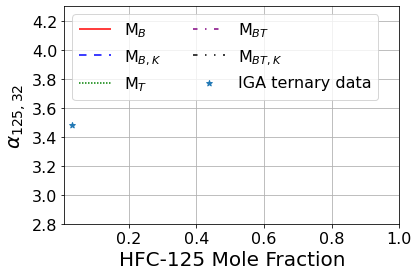

In [8]:
alpha1 = np.zeros(len(R125_z))
alpha2 = np.zeros(len(R125_z))
alpha3 = np.zeros(len(R125_z))
alpha4 = np.zeros(len(R125_z))
alpha5 = np.zeros(len(R125_z))

for i in range(len(R125_z)):
    alpha1[i] = (R125_y[i]/R125_x[i])/(R32_y[i]/R32_x[i])
    alpha2[i] = (R125_y2[i]/R125_x2[i])/(R32_y2[i]/R32_x2[i])
    alpha3[i] = (R125_y3[i]/R125_x3[i])/(R32_y3[i]/R32_x3[i])
    alpha4[i] = (R125_y4[i]/R125_x4[i])/(R32_y4[i]/R32_x4[i])
    alpha5[i] = (R125_y5[i]/R125_x5[i])/(R32_y5[i]/R32_x5[i])

alpha2[5] = alpha2[4]
R125_x2[5] = R125_x[5]    
    
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plt.title('Volatility using [bmim][PF$_6$] @100kPa',fontsize=20)
plt.ylabel(r'$\alpha_{125,32}$',fontsize=20)
plt.xlabel('HFC-125 Mole Fraction',fontsize=20)
plt.grid(True)

plt.plot(.5,.5,linestyle=linestyle[0], color='red',label="M$_B$")
plt.plot(.5,.5,linestyle=linestyle[1], color='blue',label="M$_{B,K}$") 
plt.plot(.5,.5,linestyle=linestyle[2], color='green',label="M$_T$") 
plt.plot(.5,.5,linestyle=linestyle[3], color='purple',label="M$_{BT}$") 
plt.plot(.5,.5,linestyle=linestyle[4], color='black',label="M$_{BT,K}$") 

plt.scatter([0.032],[3.48],marker="*",label="IGA ternary data")
plt.ylim(2.8,4.3)
plt.xlim(0.01,1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16,ncol=2, loc='upper left')
plt.savefig('Vol_[bmim][PF6]_100_2.png', bbox_inches='tight',dpi=300)
plt.show()